# Import the Library

In [492]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

import optuna

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb
import math
import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [252]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Data Exploration

In [253]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [254]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [255]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


I have columns where my standard deviation and mean are very high and very low.

In [256]:
train_df.dtypes


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

There are object , float64 and int64 data types.

In [257]:
train_df.dtypes[train_df.dtypes != 'object']

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [258]:
numeric_columns = train_df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = numeric_columns.drop('SalePrice')  # SalePrice'ı çıkarıyoruz

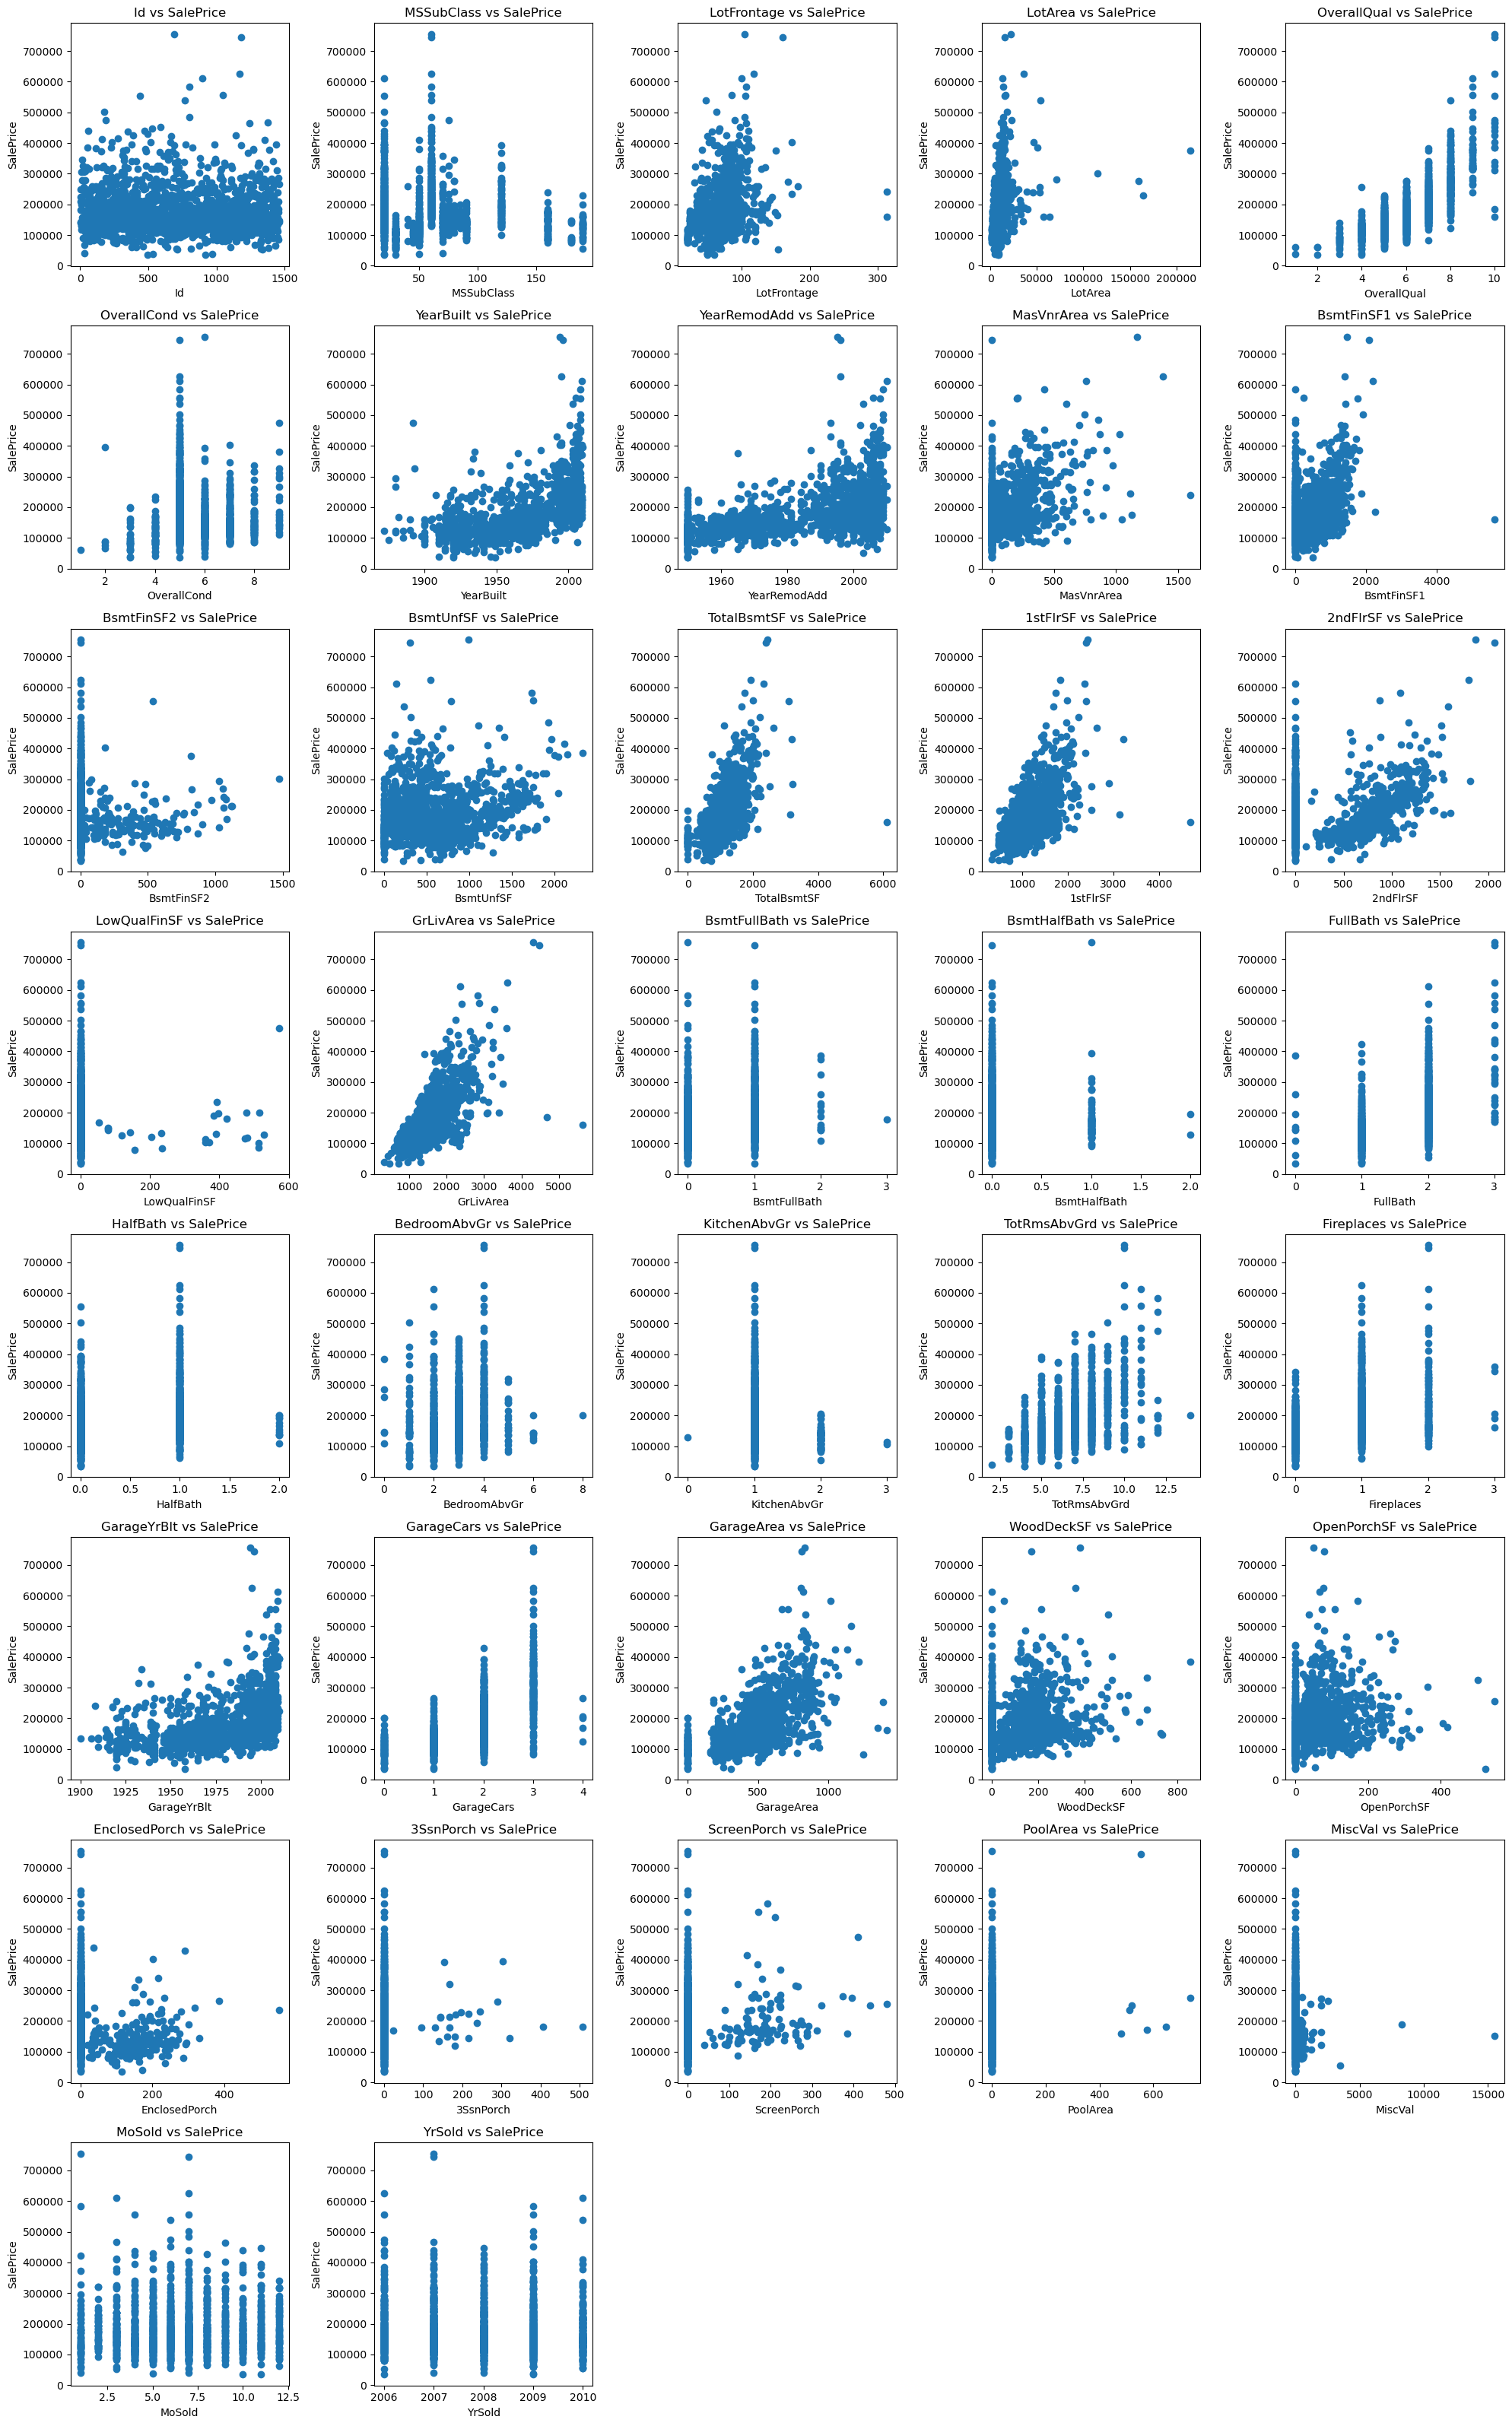

In [260]:
#select all numeric columns except Sale Price
numeric_columns = train_df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = numeric_columns.drop('SalePrice')  # SalePrice'ı çıkarıyoruz


n_cols = 5
n_rows = math.ceil(len(numeric_columns) / n_cols) 

# Figür ve axis oluşturma
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4*n_rows))
axes = axes.flatten()  # We flatten the axes to give 1,2,3,4,5... instead of 6.5 at the entrance

# Creating scatter plot for each numeric column
for i, col in enumerate(numeric_columns):
    axes[i].scatter(x=train_df[col], y=train_df['SalePrice'])
    axes[i].set_title(f'{col} vs SalePrice')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('SalePrice')

# Hide empty subplots
for i in range(len(numeric_columns), n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

I find that I don't have many outliers, so I can easily eliminate my outliers using the values ​​I observed in these graphs.

In [261]:
train_df.query('LotFrontage > 300')
#Drop 935, 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [262]:
train_df.query('LotArea > 55000')
# 250, 314, 336, 707
#maybe 1397

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1396,1397,20,RL,NaN,57200,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,160000


In [263]:
stats.zscore(train_df['LotArea']).sort_values().tail(10)

384      4.268474
457      4.280500
769      4.308262
1396     4.678682
1298     5.348867
451      6.037793
706     10.486449
249     14.881285
335     15.448542
313     20.518273
Name: LotArea, dtype: float64

In [264]:
train_df.query('OverallQual == 10')
#maybe 524

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
224,225,20,RL,103.0,13472,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,386250
389,390,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,426000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
515,516,20,RL,94.0,12220,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,New,Partial,402861
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
591,592,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


In [265]:
train_df.query('OverallCond == 2')
#379

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
250,251,30,RL,55.0,5350,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,Shed,450,5,2010,WD,Normal,76500
378,379,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,New,Partial,394432
398,399,30,RM,60.0,8967,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Abnorml,67000
676,677,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87000


In [266]:
train_df.query('OverallCond == 5 & SalePrice > 700000')
#1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [267]:
train_df.query('OverallCond == 6 & SalePrice > 700000')
#692

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


In [268]:
train_df.query('YearBuilt < 1900 & SalePrice > 400000')
#186

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


In [269]:
train_df.query('YearRemodAdd < 1970 & SalePrice > 300000')
#314

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000


In [270]:
train_df.query('MasVnrArea > 1500')
#298

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000


In [271]:
train_df.query('BsmtFinSF1 > 5000')
#1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [272]:
train_df.query('BsmtFinSF2 > 400 & SalePrice > 500000')
#441

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000


In [273]:
train_df.query('TotalBsmtSF > 5000')
#1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [274]:
train_df.query('LowQualFinSF > 500')
#186

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
170,171,50,RM,NaN,12358,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,128500
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000
1009,1010,50,RL,60.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,102000


In [275]:
train_df.query('GrLivArea > 4400')
#524, 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [276]:
train_df.query('BsmtFullBath == 3')
#739

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
738,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000


In [277]:
train_df.query('BsmtHalfBath == 2')
#598, 955

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
597,598,120,RL,53.0,3922,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,New,Partial,194201
954,955,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand,127500


In [278]:
train_df.query('BedroomAbvGr == 8')
#636

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


In [279]:
train_df.query('KitchenAbvGr == 3')
#49, 810

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
809,810,75,RM,90.0,8100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,11,2009,WD,Normal,106000


In [280]:
train_df.query('TotRmsAbvGrd == 14')
#636

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


In [281]:
train_df.query('GarageArea > 1200')
#1062, 1191

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
825,826,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,New,Partial,385000
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [282]:
train_df.query('OpenPorchSF > 500')
#496

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
1328,1329,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,1150,6,2008,WD,Normal,256000


In [283]:
train_df.query('EnclosedPorch > 500')
#198

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000


# Drop Outliers

In [284]:
values = [598, 955, 935, 1299, 250, 314, 336, 707, 379, 1183, 692, 186, 441, 186, 524, 739, 598, 955, 636, 1062, 1191, 496, 198, 1338]

In [285]:
train_df = train_df[train_df["Id"].isin(values) == False]

# Null Values

In [286]:
pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False)).head(20)

,0
PoolQC,1435
MiscFeature,1388
Alley,1350
Fence,1162
MasVnrType,861
FireplaceQu,684
LotFrontage,255
GarageYrBlt,76
GarageCond,76
GarageType,76


In [287]:
train_df['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [288]:
train_df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [289]:
train_df['Alley'].fillna('No', inplace=True)
test_df['Alley'].fillna('No', inplace=True)

C:\Users\ralpa\AppData\Local\Temp\ipykernel_12212\2277165759.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Alley'].fillna('No', inplace=True)
C:\Users\ralpa\AppData\Local\Temp\ipykernel_12212\2277165759.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

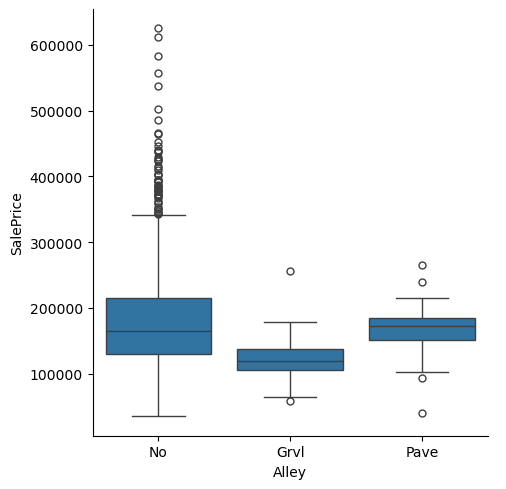

In [290]:
sns.catplot(data=train_df, x="Alley", y="SalePrice", kind="box")

In [291]:
train_df['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [292]:
train_df['Fence'].fillna('No', inplace=True)
test_df['Fence'].fillna('No', inplace=True)

C:\Users\ralpa\AppData\Local\Temp\ipykernel_12212\3730986352.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Fence'].fillna('No', inplace=True)
C:\Users\ralpa\AppData\Local\Temp\ipykernel_12212\3730986352.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

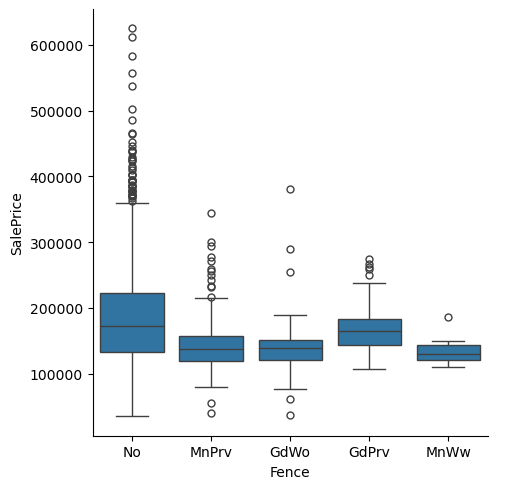

In [293]:
sns.catplot(data=train_df, x="Fence", y="SalePrice", kind="box")

In [294]:
train_df['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

# Filling in missing categorical data with No.
Filling missing values with "No" is often logical, as it indicates that there is no masonry veneer present in the data. Using "No" helps make the data meaningful and consistent while also contributing to the model's ability to learn accurately. Filling missing values with the most frequent value (mode) can lead to incorrect categorizations, causing the model to learn false information and negatively impacting its performance. Similarly, more complex methods like KNN Imputation can yield meaningless results, especially with categorical data, and introduce unnecessary computational costs. Therefore, using a contextually relevant value for imputation provides a simpler, faster, and more effective solution.

In [295]:
train_df['MasVnrType'].fillna('No', inplace=True)
test_df['MasVnrType'].fillna('No', inplace=True)

C:\Users\ralpa\AppData\Local\Temp\ipykernel_12212\2175816292.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['MasVnrType'].fillna('No', inplace=True)
C:\Users\ralpa\AppData\Local\Temp\ipykernel_12212\2175816292.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

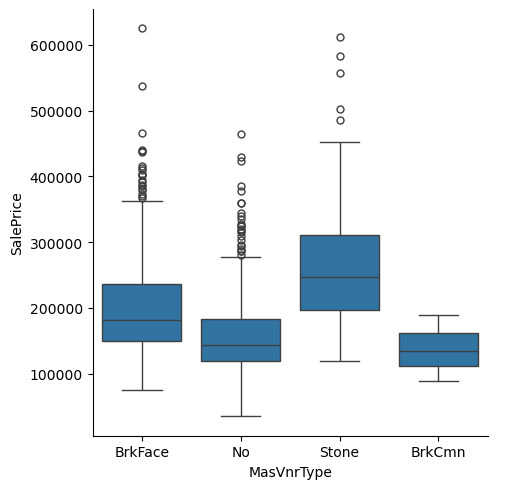

In [296]:
sns.catplot(data=train_df, x="MasVnrType", y="SalePrice", kind="box")

In [297]:
train_df['MasVnrArea'].fillna(0, inplace=True)
test_df['MasVnrArea'].fillna(0, inplace=True)

C:\Users\ralpa\AppData\Local\Temp\ipykernel_12212\3657060107.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['MasVnrArea'].fillna(0, inplace=True)
C:\Users\ralpa\AppData\Local\Temp\ipykernel_12212\3657060107.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [298]:
train_df['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [299]:
train_df['FireplaceQu'].fillna('No', inplace=True)
test_df['FireplaceQu'].fillna('No', inplace=True)

C:\Users\ralpa\AppData\Local\Temp\ipykernel_12212\2825947256.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['FireplaceQu'].fillna('No', inplace=True)
C:\Users\ralpa\AppData\Local\Temp\ipykernel_12212\2825947256.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

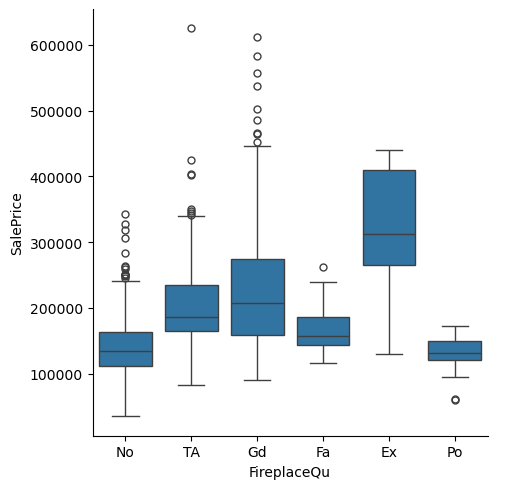

In [300]:
sns.catplot(data=train_df, x="FireplaceQu", y="SalePrice", kind="box")

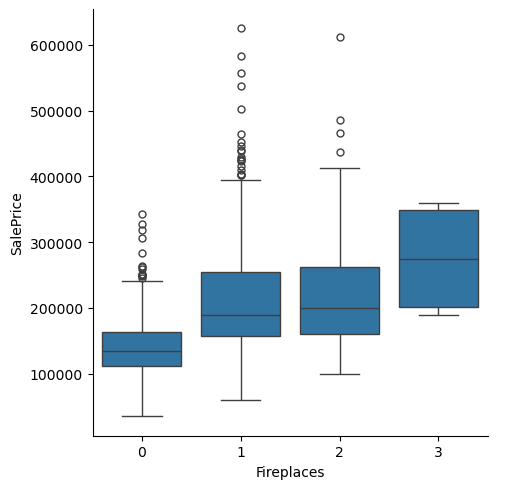

In [301]:
sns.catplot(data=train_df, x="Fireplaces", y="SalePrice", kind="box")

In [302]:
train_df['LotFrontage'].fillna(0, inplace=True)
test_df['LotFrontage'].fillna(0, inplace=True)

C:\Users\ralpa\AppData\Local\Temp\ipykernel_12212\1334701034.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['LotFrontage'].fillna(0, inplace=True)
C:\Users\ralpa\AppData\Local\Temp\ipykernel_12212\1334701034.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [303]:
train_df['GarageYrBlt'].corr(train_df['YearBuilt'])

0.8289827595060575

In [304]:
train_df['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [305]:
train_df['GarageCond'].fillna('No', inplace=True)
test_df['GarageCond'].fillna('No', inplace=True)

C:\Users\ralpa\AppData\Local\Temp\ipykernel_12212\1255948083.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageCond'].fillna('No', inplace=True)
C:\Users\ralpa\AppData\Local\Temp\ipykernel_12212\1255948083.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

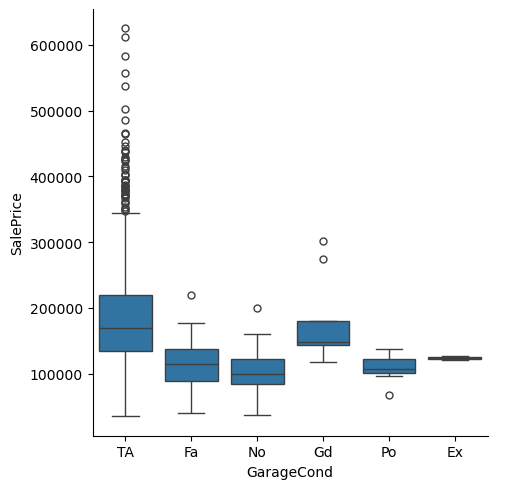

In [306]:
sns.catplot(data=train_df, x="GarageCond", y="SalePrice", kind="box")

In [307]:
train_df['GarageType'].fillna('No', inplace=True)
test_df['GarageType'].fillna('No', inplace=True)

C:\Users\ralpa\AppData\Local\Temp\ipykernel_12212\3721453499.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageType'].fillna('No', inplace=True)
C:\Users\ralpa\AppData\Local\Temp\ipykernel_12212\3721453499.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

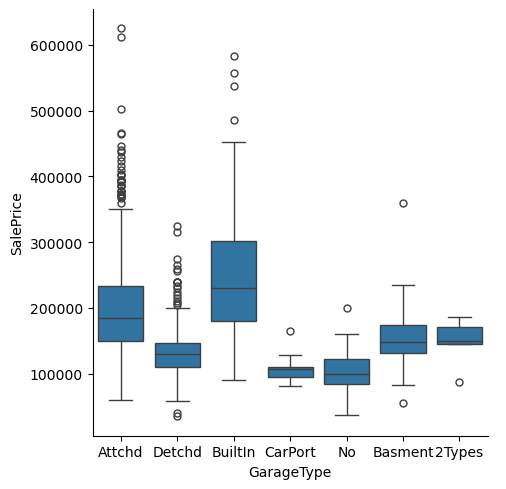

In [308]:
sns.catplot(data=train_df, x="GarageType", y="SalePrice", kind="box")

In [309]:
train_df['GarageFinish'].fillna('No', inplace=True)
test_df['GarageFinish'].fillna('No', inplace=True)

C:\Users\ralpa\AppData\Local\Temp\ipykernel_12212\2912414829.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageFinish'].fillna('No', inplace=True)
C:\Users\ralpa\AppData\Local\Temp\ipykernel_12212\2912414829.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

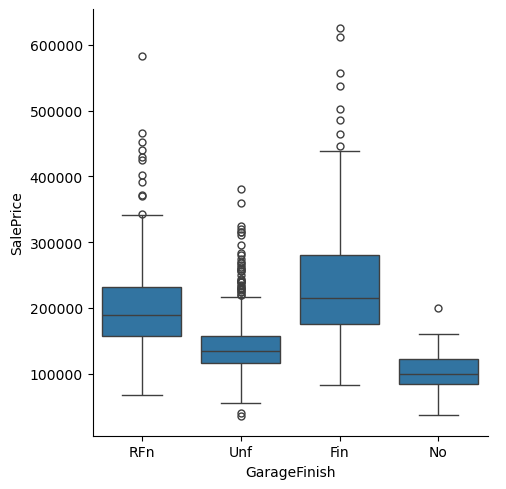

In [310]:
sns.catplot(data=train_df, x="GarageFinish", y="SalePrice", kind="box")

In [311]:
train_df['GarageQual'].fillna('No', inplace=True)
test_df['GarageQual'].fillna('No', inplace=True)

C:\Users\ralpa\AppData\Local\Temp\ipykernel_12212\94532614.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageQual'].fillna('No', inplace=True)
C:\Users\ralpa\AppData\Local\Temp\ipykernel_12212\94532614.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

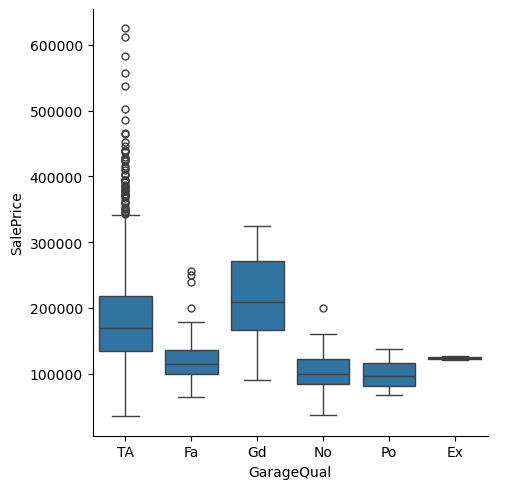

In [312]:
sns.catplot(data=train_df, x="GarageQual", y="SalePrice", kind="box")

In [313]:
train_df['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [314]:
train_df['BsmtFinType2'].fillna('Unf', inplace=True)
test_df['BsmtFinType2'].fillna('Unf', inplace=True)

C:\Users\ralpa\AppData\Local\Temp\ipykernel_12212\1071294587.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtFinType2'].fillna('Unf', inplace=True)
C:\Users\ralpa\AppData\Local\Temp\ipykernel_12212\1071294587.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

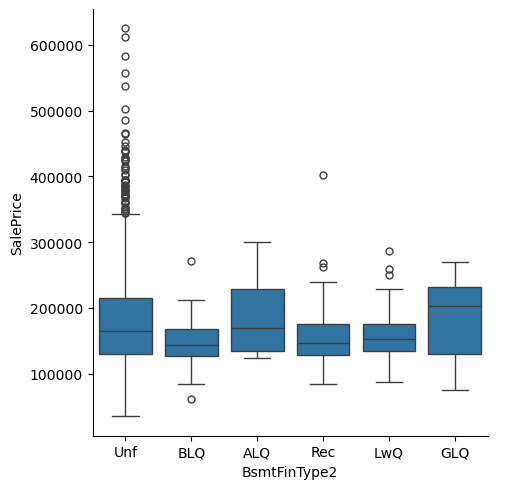

In [315]:
sns.catplot(data=train_df, x="BsmtFinType2", y="SalePrice", kind="box")

In [316]:
train_df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [317]:
train_df['BsmtExposure'].fillna('No', inplace=True)
test_df['BsmtExposure'].fillna('No', inplace=True)

C:\Users\ralpa\AppData\Local\Temp\ipykernel_12212\2040818772.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtExposure'].fillna('No', inplace=True)
C:\Users\ralpa\AppData\Local\Temp\ipykernel_12212\2040818772.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

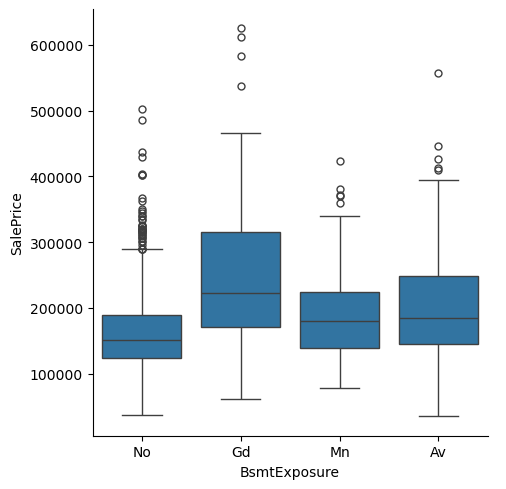

In [318]:
sns.catplot(data=train_df, x="BsmtExposure", y="SalePrice", kind="box")

In [319]:
train_df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [320]:
train_df['BsmtQual'].fillna('No', inplace=True)
test_df['BsmtQual'].fillna('No', inplace=True)

C:\Users\ralpa\AppData\Local\Temp\ipykernel_12212\2878576625.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtQual'].fillna('No', inplace=True)
C:\Users\ralpa\AppData\Local\Temp\ipykernel_12212\2878576625.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

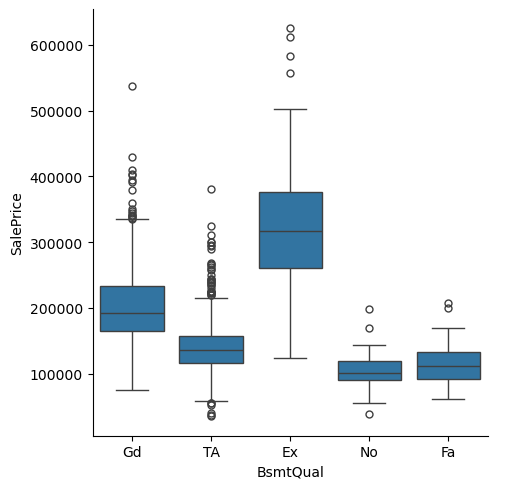

In [321]:
sns.catplot(data=train_df, x="BsmtQual", y="SalePrice", kind="box")

In [322]:
train_df['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [323]:
train_df['BsmtCond'].fillna('No', inplace=True)
test_df['BsmtCond'].fillna('No', inplace=True)

C:\Users\ralpa\AppData\Local\Temp\ipykernel_12212\2806626140.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtCond'].fillna('No', inplace=True)
C:\Users\ralpa\AppData\Local\Temp\ipykernel_12212\2806626140.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

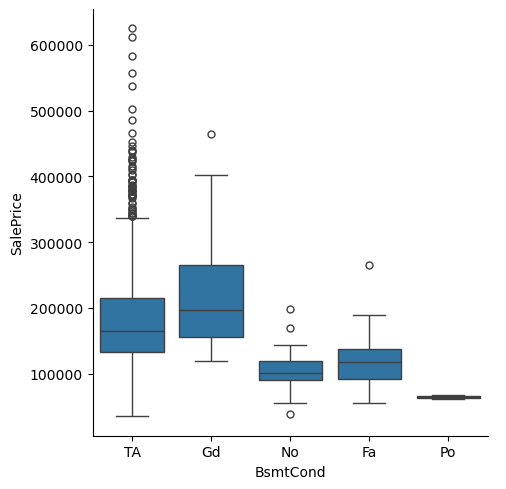

In [324]:
sns.catplot(data=train_df, x="BsmtCond", y="SalePrice", kind="box")

In [325]:
train_df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [326]:
train_df['BsmtFinType1'].fillna('Unf', inplace=True)
test_df['BsmtFinType1'].fillna('Unf', inplace=True)

C:\Users\ralpa\AppData\Local\Temp\ipykernel_12212\3531540711.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtFinType1'].fillna('Unf', inplace=True)
C:\Users\ralpa\AppData\Local\Temp\ipykernel_12212\3531540711.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

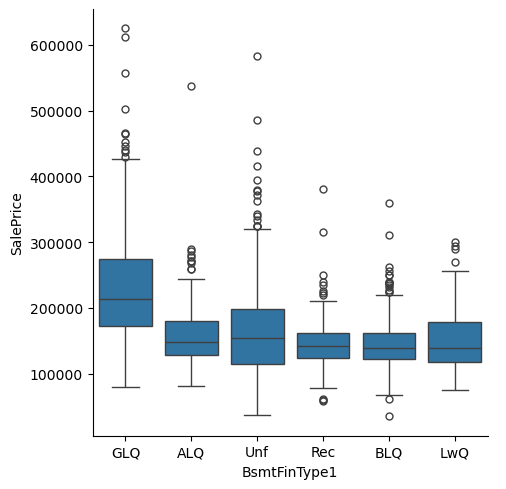

In [327]:
sns.catplot(data=train_df, x="BsmtFinType1", y="SalePrice", kind="box")

In [328]:
train_df['MasVnrArea'].fillna(0, inplace=True)
test_df['MasVnrArea'].fillna(0, inplace=True)

C:\Users\ralpa\AppData\Local\Temp\ipykernel_12212\3657060107.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['MasVnrArea'].fillna(0, inplace=True)
C:\Users\ralpa\AppData\Local\Temp\ipykernel_12212\3657060107.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [329]:
train_df['Electrical'].fillna('SBrkr', inplace=True)
test_df['Electrical'].fillna('SBrkr', inplace=True)

C:\Users\ralpa\AppData\Local\Temp\ipykernel_12212\4245203846.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Electrical'].fillna('SBrkr', inplace=True)
C:\Users\ralpa\AppData\Local\Temp\ipykernel_12212\4245203846.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

# Feature Engineering

In [330]:
#There are too many missing values ​​in PoolQC, Misc, Alley, Fence columns.
train_df = train_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])
test_df = test_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])

In [331]:
train_df['houseage'] = train_df['YrSold'] - train_df['YearBuilt']
test_df['houseage'] = test_df['YrSold'] - test_df['YearBuilt']

In [332]:
train_df['houseremodelage'] = train_df['YrSold'] - train_df['YearRemodAdd']
test_df['houseremodelage'] = test_df['YrSold'] - test_df['YearRemodAdd']

In [333]:
train_df['totalsf'] = train_df['1stFlrSF'] + train_df['2ndFlrSF'] + train_df['BsmtFinSF1'] + train_df['BsmtFinSF2']
test_df['totalsf'] = test_df['1stFlrSF'] + test_df['2ndFlrSF'] + test_df['BsmtFinSF1'] + test_df['BsmtFinSF2']

In [334]:
train_df['totalarea'] = train_df['GrLivArea'] + train_df['TotalBsmtSF']
test_df['totalarea'] = test_df['GrLivArea'] + test_df['TotalBsmtSF']

In [335]:
train_df['totalbaths'] = train_df['BsmtFullBath'] + train_df['FullBath'] + 0.5 * (train_df['BsmtHalfBath'] + train_df['HalfBath']) 
test_df['totalbaths'] = test_df['BsmtFullBath'] + test_df['FullBath'] + 0.5 * (test_df['BsmtHalfBath'] + test_df['HalfBath']) 

In [336]:
train_df['totalporchsf'] = train_df['OpenPorchSF'] + train_df['3SsnPorch'] + train_df['EnclosedPorch'] + train_df['ScreenPorch'] + train_df['WoodDeckSF']
test_df['totalporchsf'] = test_df['OpenPorchSF'] + test_df['3SsnPorch'] + test_df['EnclosedPorch'] + test_df['ScreenPorch'] + test_df['WoodDeckSF']

In [337]:
train_df = train_df.drop(columns=['Id','YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])
test_df = test_df.drop(columns=['YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])

<Axes: >

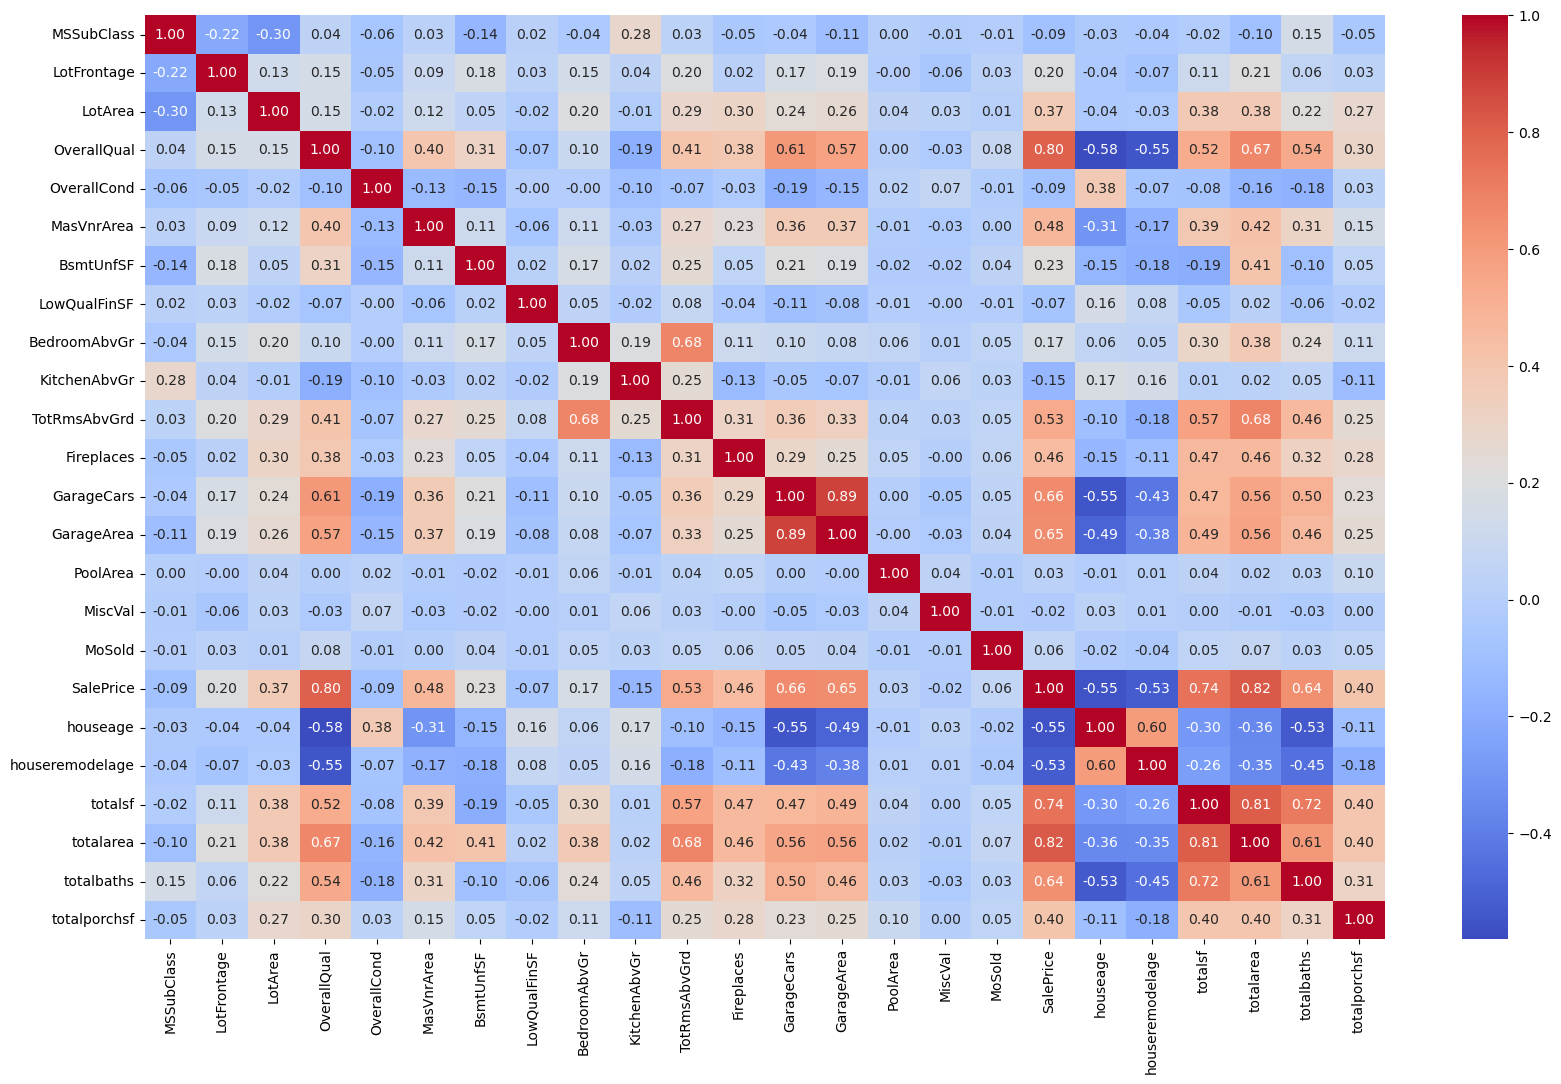

In [338]:
correlation_matrix = train_df.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [339]:
#GarageArea columns are Corelated with GarageCars
train_df = train_df.drop(columns=['GarageArea'])
test_df = test_df.drop(columns=['GarageArea'])

<Axes: xlabel='SalePrice', ylabel='Count'>

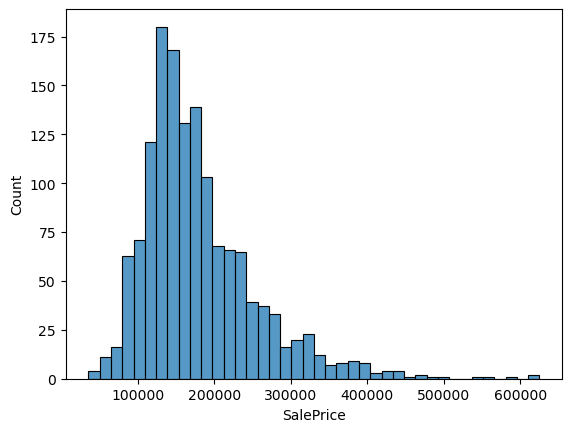

In [340]:
sns.histplot(
    train_df,
    x=train_df['SalePrice']
)

The log transformation using np.log1p(train_df['SalePrice']) is applied to normalize the skewed distribution of the sales price data. This transformation reduces the impact of outliers, allowing the model to learn more effectively and establish a stronger linear relationship between the target and independent variables. The use of np.log1p ensures a safe transformation for small or near-zero values. As a result, model performance and accuracy improve.

In [341]:
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

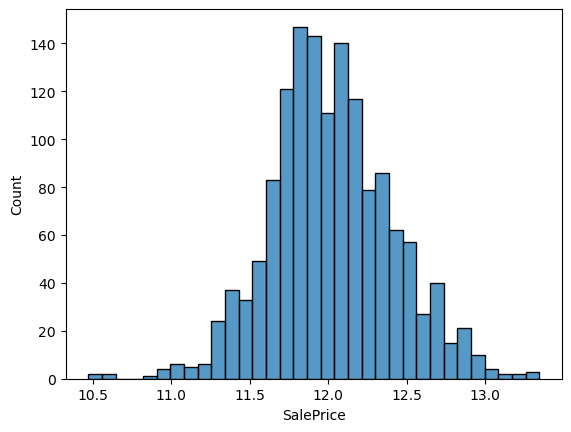

In [342]:
sns.histplot(
    train_df,
    x=train_df['SalePrice']
)

In [343]:
train_df.dtypes[train_df.dtypes=='object']

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [344]:
train_df.dtypes[train_df.dtypes !='object']

MSSubClass           int64
LotFrontage        float64
LotArea              int64
OverallQual          int64
OverallCond          int64
MasVnrArea         float64
BsmtUnfSF            int64
LowQualFinSF         int64
BedroomAbvGr         int64
KitchenAbvGr         int64
TotRmsAbvGrd         int64
Fireplaces           int64
GarageCars           int64
PoolArea             int64
MiscVal              int64
MoSold               int64
SalePrice          float64
houseage             int64
houseremodelage      int64
totalsf              int64
totalarea            int64
totalbaths         float64
totalporchsf         int64
dtype: object

# Pipeline
By using the Pipeline, I can manage the data preprocessing steps in a structured, modular, and repeatable way. I define separate steps for numerical, ordinal, and categorical data, allowing me to apply the appropriate transformations for each type of data easily. This setup minimizes the risk of errors and ensures that I consistently apply the same steps to both the training and test data. Additionally, with parallel processing support, I can reduce the processing time. While manually or using alternative methods to handle each step individually can be complex and error-prone, using the Pipeline gives me a more flexible and efficient solution.

In [345]:
ode_cols = ['LotShape', 'LandContour','Utilities','LandSlope',  'BsmtQual',  'BsmtFinType1',  'CentralAir',  'Functional', \
           'FireplaceQu', 'GarageFinish', 'GarageQual', 'PavedDrive', 'ExterCond', 'KitchenQual', 'BsmtExposure', 'HeatingQC','ExterQual', 'BsmtCond']

In [346]:
ohe_cols = ['Street', 'LotConfig','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', \
           'MasVnrType','Foundation',  'Electrical',  'SaleType', 'MSZoning', 'SaleCondition', 'Heating', 'GarageType', 'RoofMatl']

In [347]:
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('SalePrice')


The functions I used here allow me to manage the data preprocessing process more effectively and with fewer errors. For instance, in the num_pipeline, I use SimpleImputer(strategy='mean') to fill in missing values for numerical data. While I could have chosen the median or most_frequent strategies instead, the mean generally provides a better representation for numerical data and fills in without distorting the distribution too much. Alternative methods could increase the impact of outliers or create more deviation from the mean.

For ordinal data, I use OrdinalEncoder because there are ordered relationships among the categorical variables. Using OneHotEncoder in this case would not be appropriate since, when there is a natural ordering among the categories, ordinal encoding yields better performance. Additionally, with handle_unknown='use_encoded_value', I can manage unknown categories effectively, preventing model performance from being negatively impacted.

I use OneHotEncoder to separate categorical variables into different columns because this method allows for a more accurate representation when there is no ordinal relationship between categories. Alternatives like LabelEncoder could also be used, but this method converts categories into numerical values and imposes an ordinal meaning, which can lead to incorrect model learning.

The main reason I prefer these methods is that they are the most suitable and performance-optimizing solutions for the types of data I am working with. Most alternatives are either not compatible with the data structure or can negatively affect the accuracy of the model.

In [348]:
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()) #0-1
])

In [349]:
ode_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)) # categorik veriler ordinal sıralanır
])

In [350]:
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) #categorik veriler ayrı sutunlara ayrılır
])

In [351]:
col_trans = ColumnTransformer(transformers=[
    ('num_p', num_pipeline, num_cols),
    ('ode_p', ode_pipeline, ode_cols),
    ('ohe_p', ohe_pipeline, ohe_cols),
    ],
    remainder='passthrough', 
    n_jobs=-1)

In [352]:
pipeline = Pipeline(steps=[
    ('preprocessing', col_trans)
])

In [353]:
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

In [354]:
X_preprocessed = pipeline.fit_transform(X)

# Train Test Split

In [355]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Linear Regression
There are several important reasons why I initially tried Linear Regression in my model. First of all, Linear Regression is a fundamental and easy-to-understand model; this helps me quickly grasp the overall trends in the data. Additionally, this model provides a good starting point for understanding the linear relationships between the variables. Identifying the basic relationships in my dataset is an important step before moving on to more complex models. The results from Linear Regression serve as a reference point for evaluating the performance of other models. Therefore, I chose Linear Regression as my first preference due to its simplicity and effective performance.

In [356]:
lr = LinearRegression()
# Evaluating the performance of the model using cross-validation
scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Converting negative MSE value to positive and calculating RMSE
rmse_scores = np.sqrt(-scores)


lr_best_rmse_index = np.argmin(rmse_scores)
lr_best_rmse = rmse_scores[lr_best_rmse_index]

# Print results
print("Cross-Validation RMSE Scores: ", rmse_scores)
print("Mean RMSE: ", np.mean(rmse_scores))


Cross-Validation RMSE Scores:  [3.41135207e+08 7.38996073e+08 4.28069575e+08 2.64601319e+08
 2.89332406e+08]
Mean RMSE:  412426915.9895853


# Optuna
Although there are alternatives like Grid Search and Random Search, these methods can require significant time and computational resources when dealing with high-dimensional hyperparameter spaces. Grid Search systematically evaluates all possible combinations, which can lead to unnecessary evaluations. On the other hand, Random Search takes random samples, which carries the risk of skipping optimal areas. Optuna dynamically adjusts the search process based on previous trials, providing more efficient exploration and better performance.

Other libraries, such as Hyperopt and Ray Tune, also offer hyperparameter optimization, but I prefer Optuna because it offers simplicity, ease of use, and strong community support. The ability of Optuna to visualize optimization processes and easily track results allows me to better understand the search process and the effectiveness of different hyperparameter configurations.



# RandomForestRegressor
RandomForestRegressor kullanmamın sebebi, modelin güçlü genel performansı ve esnekliğidir. Çok sayıda karar ağacı kullanarak tahminlerde bulunduğu için, aşırı uyum riskini azaltırken farklı veri noktalarındaki varyasyonu daha iyi yakalayabiliyor. Ayrıca, hem sayısal hem de kategorik verilerle etkili bir şekilde çalışabilmesi, veri setimin karmaşıklığını yönetmemi kolaylaştırıyor.
Hiperparametre optimizasyonu ile performansı artırma olanağı sunması, farklı ayarları deneyerek en iyi sonuçları elde etmemi sağlıyor. Modelin değişkenlerin önem derecelerini değerlendirme yeteneği, hangi özelliklerin tahmin üzerindeki etkisini anlamama yardımcı oluyor, bu da sonuçlarımı daha iyi yorumlayabilmemi sağlıyor. Tüm bu nedenlerle, RandomForestRegressor benim için güvenilir ve etkili bir çözüm olarak öne çıkıyor

In [357]:
def objective(trial):
    # Hyperparameters that Optuna will optimize
    max_depth = trial.suggest_int('max_depth', 5, 20)  
    n_estimators = trial.suggest_int('n_estimators', 100, 500) 
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    
    RFR = RandomForestRegressor(
        max_depth=max_depth,
        n_estimators=n_estimators,
        min_samples_split=min_samples_split,
        random_state=42
    )
    
    # Evaluating the performance of the model using cross-validation (negative MSE)
    score = cross_val_score(RFR, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    # scoring: Metric to evaluate the performance of the model (e.g. 'accuracy', 'neg_mean_squared_error', 'f1', 'roc_auc', etc.).
    # Return positive MSE
    return np.sqrt(-score)

#Create an Optuna workspace
study = optuna.create_study(direction='minimize')

# the number of trials to be tried is determined by n_trials
study.optimize(objective, n_trials=20)

# Getting the best results
print("Best trial:")
rfr_trial = study.best_trial


# Get the best hyperparameters
best_params = rfr_trial.params

# Creating the best model
best_rf_model = RandomForestRegressor(
    max_depth=best_params['max_depth'],
    n_estimators=best_params['n_estimators'],
    min_samples_split=best_params['min_samples_split'],
    random_state=13
)

# Training the model
best_rf_model.fit(X_train, y_train)

#predictions on the test set
y_pred_best_rf = best_rf_model.predict(X_test)

# RMSE calculation
rmse_best_rf = mean_squared_error(y_test, y_pred_best_rf, squared=False)
print("Best Random Forest RMSE:", rmse_best_rf)
print(f"Best hyperparameters: {rfr_trial.params}")


[I 2024-09-27 20:23:06,120] A new study created in memory with name: no-name-f135592a-b997-4f50-99a0-d577d95ef332
[I 2024-09-27 20:23:13,582] Trial 0 finished with value: 0.14242516355392973 and parameters: {'max_depth': 6, 'n_estimators': 217, 'min_samples_split': 2}. Best is trial 0 with value: 0.14242516355392973.
[I 2024-09-27 20:23:22,360] Trial 1 finished with value: 0.13573366087598546 and parameters: {'max_depth': 11, 'n_estimators': 176, 'min_samples_split': 8}. Best is trial 1 with value: 0.13573366087598546.
[I 2024-09-27 20:23:29,653] Trial 2 finished with value: 0.13596391419559023 and parameters: {'max_depth': 16, 'n_estimators': 149, 'min_samples_split': 10}. Best is trial 1 with value: 0.13573366087598546.
[I 2024-09-27 20:23:38,346] Trial 3 finished with value: 0.14234380606405014 and parameters: {'max_depth': 6, 'n_estimators': 260, 'min_samples_split': 7}. Best is trial 1 with value: 0.13573366087598546.
[I 2024-09-27 20:23:58,036] Trial 4 finished with value: 0.1339

Best trial:
Best Random Forest RMSE: 0.1513372385992272
Best hyperparameters: {'max_depth': 18, 'n_estimators': 494, 'min_samples_split': 3}


C:\Users\ralpa\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# XGBRegressor
There are several reasons why I prefer using XGBoost. First and foremost, XGBoost is a powerful model that offers high accuracy and can work effectively with large datasets, which is particularly important for modeling complex relationships. Additionally, XGBoost's parallel processing capabilities allow for very fast model training. The flexibility it provides for hyperparameter optimization enables me to enhance the model's performance. On the other hand, while alternative methods like Random Forest generally yield better results with high-dimensional datasets, XGBoost's regularization capabilities help mitigate the risk of overfitting. Finally, XGBoost's ability to evaluate feature importance aids me in understanding which features impact model performance, allowing for better interpretation of the results.

In [358]:
def objective(trial):
    learning_rate =trial.suggest_float("learning_rate",0.05,0.3)
    n_estimators =trial.suggest_int("n_estimators",200,400)
    max_depth = trial.suggest_int("max_depth",3,5)
    min_child_weight = trial.suggest_int("min_child_weight",1,5)
    gamma = trial.suggest_float("gamma",0,0.5)
    subsample = trial.suggest_float("subsample",0.7,1)
    colsample_bytree =trial.suggest_float("colsample_bytree",0.7,1)
    xgb =XGBRegressor(
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_child_weight=min_child_weight,
        gamma=gamma,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        
    )
    score = cross_val_score(xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    return np.sqrt(-score)

study=optuna.create_study(direction="minimize")
study.optimize(objective,n_trials=20)

print("Best trial :")
xgb_trial = study.best_trial


best_params = xgb_trial.params
best_xgb = XGBRegressor(
    learning_rate=best_params['learning_rate'],
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_child_weight=best_params['min_child_weight'],
    gamma=best_params['gamma'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree']
)


best_xgb.fit(X_train, y_train)


y_pred = best_xgb.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test set RMSE: {rmse}")
print(f"Best hyperparametrs : {xgb_trial.params}")
    

[I 2024-09-27 20:29:37,030] A new study created in memory with name: no-name-2fc0997a-9c7b-4e70-abf1-f8eaa25fbd11
[I 2024-09-27 20:29:37,703] Trial 0 finished with value: 0.1311810922974754 and parameters: {'learning_rate': 0.12977495547380857, 'n_estimators': 230, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.3590262042627784, 'subsample': 0.7109601316402288, 'colsample_bytree': 0.7203765735028558}. Best is trial 0 with value: 0.1311810922974754.
[I 2024-09-27 20:29:38,270] Trial 1 finished with value: 0.13714242172051955 and parameters: {'learning_rate': 0.297429468063508, 'n_estimators': 217, 'max_depth': 3, 'min_child_weight': 3, 'gamma': 0.37300711646367607, 'subsample': 0.9440607428175285, 'colsample_bytree': 0.9032179853851048}. Best is trial 0 with value: 0.1311810922974754.
[I 2024-09-27 20:29:38,839] Trial 2 finished with value: 0.13563890299180656 and parameters: {'learning_rate': 0.2949168227227254, 'n_estimators': 219, 'max_depth': 5, 'min_child_weight': 5, 'gamma': 0.

Best trial :
Test set RMSE: 0.13476988907851073
Best hyperparametrs : {'learning_rate': 0.1890241536940629, 'n_estimators': 262, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 0.00541319483500452, 'subsample': 0.8401149394535496, 'colsample_bytree': 0.7827147884391064}


# Ridge
There are several important reasons why I prefer using Ridge regression. First and foremost, Ridge regression is known for providing regularization to minimize the overfitting problem encountered in multiple linear regression. This helps the model to be more generalizable and less affected by noise in the training data.

While alternative methods like Lasso regression can be useful for variable selection, Ridge regression allows all variables to remain in the model, which can lead to better predictive performance in some cases. Additionally, Ridge regression can effectively handle high-dimensional datasets, enabling me to achieve good results even when the number of features is very high. In particular, the ability of Ridge regression to control the complexity of the data by adding a fixed regularization term offers a significant advantage for me. Ultimately, Ridge regression becomes a suitable choice for me in terms of overall performance and computational efficiency.

In [359]:
def objective(trial):
    alpha = trial.suggest_categorical("alpha", [0.05, 0.1, 1, 3, 5, 10])
    solver = trial.suggest_categorical("solver", ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag'])

    ridge = Ridge(alpha=alpha, solver=solver)

    score = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    return np.sqrt(-score)


study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)


print("Best trial:")
rdg_trial = study.best_trial

best_params = rdg_trial.params
ridge_model = Ridge(
    alpha=best_params['alpha'],
    solver=best_params['solver']
)

ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test set RMSE: {rmse}")


print(f"RMSE: {rdg_trial.value}")
print(f"Best hyperparameters: {rdg_trial.params}")


[I 2024-09-27 20:29:54,499] A new study created in memory with name: no-name-bc2b8c2a-c695-4a6c-ac9d-2cd8369670ec
[I 2024-09-27 20:29:54,704] Trial 0 finished with value: 0.1185989111904613 and parameters: {'alpha': 0.1, 'solver': 'lsqr'}. Best is trial 0 with value: 0.1185989111904613.
C:\Users\ralpa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ralpa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ralpa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ralpa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best trial:
Test set RMSE: 0.12524413081597738
RMSE: 0.11188965444937801
Best hyperparameters: {'alpha': 10, 'solver': 'auto'}


# GradientBoostingRegressor

# Hyperopt
I prefer using Hyperopt for hyperparameter optimization due to its flexibility and advanced search strategies like TPE (Tree-structured Parzen Estimator), which help me explore the hyperparameter space more effectively. Hyperopt allows me to define parameter ranges in a more customizable way, using different types of distributions, which enhances my understanding of how specific hyperparameters impact model performance. The ability to track trial results through the Trials object gives me detailed insights into each experiment, helping me refine my search based on previous outcomes. While Optuna offers similar functionalities, Hyperopt's depth and control are particularly advantageous for complex projects where fine-tuning is essential.

In [360]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
def objective(space):
    GBR = GradientBoostingRegressor(
        max_depth=int(space['max_depth']),
        n_estimators=int(space['n_estimators']),
        min_samples_leaf=int(space['min_samples_leaf']),
        learning_rate=space['learning_rate'],
        max_features=space['max_features']
    )
    
    # Cross-validation ile skoru hesapla
    score = cross_val_score(GBR, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    return {'loss': -score, 'status': STATUS_OK}

# Hiperparametre aralıklarını belirleme
space = {
    'max_depth': hp.choice('max_depth', [12, 15, 20]),
    'n_estimators': hp.choice('n_estimators', [200, 300, 1000]),
    'min_samples_leaf': hp.choice('min_samples_leaf', [10, 25, 50]),
    'learning_rate': hp.choice('learning_rate', [0.001, 0.01, 0.1]),
    'max_features': hp.uniform('max_features', 0.01, 0.7)
}

# Optimize etme sürecini başlatma
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=20, trials=trials)

best_params = {
    'learning_rate': [0.001, 0.01, 0.1][best['learning_rate']],
    'max_depth': [12, 15, 20][best['max_depth']],
    'max_features': best['max_features'],  # Bu zaten bir float değer
    'min_samples_leaf': [10, 25, 50][best['min_samples_leaf']],
    'n_estimators': [200, 300, 1000][best['n_estimators']]
}
best_GBR = GradientBoostingRegressor(
    max_depth=best_params['max_depth'],
    n_estimators=best_params['n_estimators'],
    min_samples_leaf=best_params['min_samples_leaf'],
    learning_rate=best_params['learning_rate'],
    max_features=best_params['max_features']
)

# Modeli eğitim verileriyle eğitme
best_GBR.fit(X_train, y_train)

# Test verileriyle tahmin yapma
y_pred = best_GBR.predict(X_test)

# En iyi modeli oluşturma
best_GBR = GradientBoostingRegressor(
    max_depth=best_params['max_depth'],
    n_estimators=best_params['n_estimators'],
    min_samples_leaf=best_params['min_samples_leaf'],
    learning_rate=best_params['learning_rate'],
    max_features=best_params['max_features']
)

# Modeli eğitim verileriyle eğitme
best_GBR.fit(X_train, y_train)

# Test verileriyle tahmin yapma
y_pred = best_GBR.predict(X_test)

# Performansı ölçme (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Best Model RMSE:", rmse)

# En iyi hiperparametreleri yazdırma
print("Best Hyperparameters:", best_params)

100%|██████████| 20/20 [02:27<00:00,  7.38s/trial, best loss: 0.013082308358241474]
Best Model RMSE: 0.12783223137200805
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 20, 'max_features': 0.1559440410165913, 'min_samples_leaf': 25, 'n_estimators': 1000}


# LGBMRegressor
One of the main reasons I prefer using LGBMRegressor is its ability to train quickly and efficiently on large datasets. LightGBM works with histogram-based methods, which reduces memory usage and shortens processing times. Additionally, hyperparameters like "num_leaves" and "boosting_type" enhance the model's flexibility, allowing it to better learn complex relationships. While there are alternative methods like XGBoost, LightGBM generally performs faster and better on large datasets. Ultimately, I wanted to see how this model would perform on my dataset due to its high performance and efficiency.

In [361]:
import optuna
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

def objective(trial):
    lgbm_regressor = LGBMRegressor(
        boosting_type=trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
        num_leaves=trial.suggest_int('num_leaves', 20, 40),
        learning_rate=trial.suggest_float('learning_rate', 0.01, 0.1),
        n_estimators=trial.suggest_int('n_estimators', 100, 300)
    )
    
    score = cross_val_score(lgbm_regressor, X_train, y_train, cv=3, scoring='neg_mean_squared_error').mean()
    return -score  # Minimization problem

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

print("Best trial: ")
lgbm_trial = study.best_trial

best_lgbm_model = LGBMRegressor(
    boosting_type=lgbm_trial.params['boosting_type'],
    num_leaves=lgbm_trial.params['num_leaves'],
    learning_rate=lgbm_trial.params['learning_rate'],
    n_estimators=lgbm_trial.params['n_estimators']
)

# Modeli eğitme
best_lgbm_model.fit(X_train, y_train)

# Tahmin yapma
y_pred = best_lgbm_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse}")



[I 2024-09-27 20:32:42,108] A new study created in memory with name: no-name-e8d92510-80b2-4230-8fe3-4ef30ac85014


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001690 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1824
[LightGBM] [Info] Number of data points in the train set: 767, number of used features: 104
[LightGBM] [Info] Start training from score 12.049870
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-09-27 20:32:42,615] Trial 0 finished with value: 0.01576958345819778 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 40, 'learning_rate': 0.057629724336922344, 'n_estimators': 154}. Best is trial 0 with value: 0.01576958345819778.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-09-27 20:32:43,153] Trial 1 finished with value: 0.015690008797971625 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 38, 'learning_rate': 0.09141837684228274, 'n_estimators': 171}. Best is trial 1 with value: 0.015690008797971625.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000429 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1824
[LightGBM] [Info] Number of data points in the train set: 767, number of used features: 104
[LightGBM] [Info] Start training from score 12.049870
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-09-27 20:32:43,763] Trial 2 finished with value: 2.856723226237427 and parameters: {'boosting_type': 'dart', 'num_leaves': 29, 'learning_rate': 0.06052606727312326, 'n_estimators': 173}. Best is trial 1 with value: 0.015690008797971625.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1824
[LightGBM] [Info] Number of data points in the train set: 767, number of used features: 104
[LightGBM] [Info] Start training from score 12.049870
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-09-27 20:32:44,058] Trial 3 finished with value: 0.015646383591597614 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 32, 'learning_rate': 0.06295383138807022, 'n_estimators': 114}. Best is trial 3 with value: 0.015646383591597614.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1824
[LightGBM] [Info] Number of data points in the train set: 767, number of used features: 104
[LightGBM] [Info] Start training from score 12.049870
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-09-27 20:32:45,117] Trial 4 finished with value: 0.2370575361283742 and parameters: {'boosting_type': 'dart', 'num_leaves': 30, 'learning_rate': 0.07090713928489394, 'n_estimators': 280}. Best is trial 3 with value: 0.015646383591597614.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1824
[LightGBM] [Info] Number of data points in the train set: 767, number of used features: 104
[LightGBM] [Info] Start training from score 12.049870
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-09-27 20:32:45,677] Trial 5 finished with value: 0.015613122476927277 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 36, 'learning_rate': 0.08051675054330971, 'n_estimators': 211}. Best is trial 5 with value: 0.015613122476927277.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-09-27 20:32:46,849] Trial 6 finished with value: 0.2699992707849155 and parameters: {'boosting_type': 'dart', 'num_leaves': 40, 'learning_rate': 0.06695150441134803, 'n_estimators': 278}. Best is trial 5 with value: 0.015613122476927277.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-09-27 20:32:47,971] Trial 7 finished with value: 0.8900516616928705 and parameters: {'boosting_type': 'dart', 'num_leaves': 26, 'learning_rate': 0.047455917671800525, 'n_estimators': 282}. Best is trial 5 with value: 0.015613122476927277.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000563 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1824
[LightGBM] [Info] Number of data points in the train set: 767, number of used features: 104
[LightGBM] [Info] Start training from score 12.049870
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-09-27 20:32:48,456] Trial 8 finished with value: 0.015646550641981602 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 38, 'learning_rate': 0.043495370851312685, 'n_estimators': 194}. Best is trial 5 with value: 0.015613122476927277.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-09-27 20:32:48,872] Trial 9 finished with value: 6.904960907976011 and parameters: {'boosting_type': 'dart', 'num_leaves': 29, 'learning_rate': 0.041010599056152765, 'n_estimators': 118}. Best is trial 5 with value: 0.015613122476927277.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1824
[LightGBM] [Info] Number of data points in the train set: 767, number of used features: 104
[LightGBM] [Info] Start training from score 12.049870
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000430 seconds.
You can set `force_row_wise=true` to rem

[I 2024-09-27 20:32:49,405] Trial 10 finished with value: 0.016711801603812915 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 20, 'learning_rate': 0.016245374639326834, 'n_estimators': 234}. Best is trial 5 with value: 0.015613122476927277.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1824
[LightGBM] [Info] Number of data points in the train set: 767, number of used features: 104
[LightGBM] [Info] Start training from score 12.049870
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-09-27 20:32:49,751] Trial 11 finished with value: 0.015774422335318134 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 35, 'learning_rate': 0.09023846481288153, 'n_estimators': 101}. Best is trial 5 with value: 0.015613122476927277.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-09-27 20:32:50,472] Trial 12 finished with value: 0.015601577775126408 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 34, 'learning_rate': 0.07719958531527404, 'n_estimators': 232}. Best is trial 12 with value: 0.015601577775126408.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001246 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1824
[LightGBM] [Info] Number of data points in the train set: 767, number of used features: 104
[LightGBM] [Info] Start training from score 12.049870
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-09-27 20:32:51,203] Trial 13 finished with value: 0.015652313292533516 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 34, 'learning_rate': 0.07970431892263573, 'n_estimators': 238}. Best is trial 12 with value: 0.015601577775126408.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-09-27 20:32:51,809] Trial 14 finished with value: 0.015844017319784715 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 35, 'learning_rate': 0.0996627556300636, 'n_estimators': 233}. Best is trial 12 with value: 0.015601577775126408.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-09-27 20:32:52,266] Trial 15 finished with value: 0.01597855459526513 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 26, 'learning_rate': 0.0787331658125866, 'n_estimators': 208}. Best is trial 12 with value: 0.015601577775126408.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1824
[LightGBM] [Info] Number of data points in the train set: 767, number of used features: 104
[LightGBM] [Info] Start training from score 12.049870
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-09-27 20:32:52,897] Trial 16 finished with value: 0.016113696022033205 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 33, 'learning_rate': 0.07851413877113678, 'n_estimators': 251}. Best is trial 12 with value: 0.015601577775126408.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-09-27 20:32:53,446] Trial 17 finished with value: 0.01570972978534747 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 37, 'learning_rate': 0.031020777803089, 'n_estimators': 209}. Best is trial 12 with value: 0.015601577775126408.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-09-27 20:32:54,079] Trial 18 finished with value: 0.01589539831403416 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'learning_rate': 0.08812675169055414, 'n_estimators': 253}. Best is trial 12 with value: 0.015601577775126408.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-09-27 20:32:54,908] Trial 19 finished with value: 0.015546480074012372 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 36, 'learning_rate': 0.07179111568890459, 'n_estimators': 298}. Best is trial 19 with value: 0.015546480074012372.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

# CatBoostRegressor

I chose to use CatBoostRegressor primarily because it excels at handling categorical data without the need for extensive preprocessing. This feature saves time and enhances model accuracy, especially with complex datasets. Additionally, CatBoost employs an "Ordered Boosting" approach, which reduces overfitting and improves overall performance.

While alternatives like XGBoost and LightGBM are popular, they often require specific preprocessing steps for categorical features, which can complicate the workflow. Moreover, CatBoost tends to perform well even on smaller datasets, making it a flexible choice.
My model contains a lot of categorical data. So I wanted to see how my model would perform.

In [362]:
def objective(trial):
    # Hiperparametreleri tanımlama
    iterations = trial.suggest_int("iterations", 100, 1000)
    depth = trial.suggest_int("depth", 4, 10)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.5)

    # CatBoostRegressor modelini tanımlama
    catboost = CatBoostRegressor(
        iterations=iterations,
        depth=depth,
        learning_rate=learning_rate,
        loss_function='RMSE',
        verbose=False  # Eğitim sırasında bilgi vermesini istemiyoruz
    )

    # Cross-validation ile skoru hesaplama
    score = cross_val_score(catboost, X_train, y_train, cv=3, scoring='neg_mean_squared_error').mean()
    return np.sqrt(-score)

# Optuna çalıştırma
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)

# En iyi hiperparametreleri al
best_params = {
    'iterations': study.best_trial.params['iterations'],
    'depth': study.best_trial.params['depth'],
    'learning_rate': study.best_trial.params['learning_rate']
}

# CatBoostRegressor modelini tanımlama
best_catboost = CatBoostRegressor(
    iterations=best_params['iterations'],
    depth=best_params['depth'],
    learning_rate=best_params['learning_rate'],
    loss_function='RMSE',
    verbose=False  # Eğitim sırasında bilgi vermesini istemiyoruz
)

# Modeli eğitim verileriyle eğitme
best_catboost.fit(X_train, y_train)

# Test verileriyle tahmin yapma
y_pred = best_catboost.predict(X_test)

# Performansı ölçme (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Best Model RMSE:", rmse)

# En iyi hiperparametreleri yazdırma
print("Best Hyperparameters:", best_params)

[I 2024-09-27 20:32:55,312] A new study created in memory with name: no-name-8c94b108-fc01-4f79-9100-ee39a795d7cd
[I 2024-09-27 20:32:56,563] Trial 0 finished with value: 0.13623842624394794 and parameters: {'iterations': 225, 'depth': 4, 'learning_rate': 0.017340057858929246}. Best is trial 0 with value: 0.13623842624394794.
[I 2024-09-27 20:33:00,092] Trial 1 finished with value: 0.138711083717681 and parameters: {'iterations': 111, 'depth': 9, 'learning_rate': 0.4352109458138998}. Best is trial 0 with value: 0.13623842624394794.
[I 2024-09-27 20:33:06,650] Trial 2 finished with value: 0.1351298072894029 and parameters: {'iterations': 606, 'depth': 7, 'learning_rate': 0.49430073935990804}. Best is trial 2 with value: 0.1351298072894029.
[I 2024-09-27 20:33:31,634] Trial 3 finished with value: 0.13949136223235248 and parameters: {'iterations': 821, 'depth': 9, 'learning_rate': 0.46942692351794196}. Best is trial 2 with value: 0.1351298072894029.
[I 2024-09-27 20:33:34,733] Trial 4 fin

Best Model RMSE: 0.12655234948070088
Best Hyperparameters: {'iterations': 555, 'depth': 5, 'learning_rate': 0.0732798538287707}


# VotingRegressor
The main reason for using VotingRegressor is that it provides the opportunity to make more robust and reliable predictions by combining the predictions of different models. This is a strategy to enhance overall model performance by balancing the biases and errors of individual models. The models I have chosen include Gradient Boosting Regressor (GBR), XGBoost, and Ridge Regression. Each of these models has its unique advantages; for instance, GBR has the ability to effectively learn complex relationships, while XGBoost delivers impressive performance in terms of efficiency and speed. Ridge Regression, on the other hand, helps reduce the issue of overfitting by offering a simpler and more regularized model.

By combining the different strengths of these three models, I aim to increase my overall prediction accuracy. For example, XGBoost's strong general performance, GBR's suitability for complex datasets, and Ridge's regularization properties enhance the overall stability of the model when used together. Furthermore, this combination allows me to better represent different aspects of the dataset. This diversity helps lower prediction errors and provides more reliable results. By adjusting the weights, I optimize the influence of each model; thus, I can further improve my results by giving more importance to the models that perform better.

In [363]:
vr = VotingRegressor([('gbr',best_GBR),
                      ('xgb',best_xgb),
                      ('ridge', ridge_model)],
                    weights=[2,3,1])
vr.fit(X_train, y_train)
y_pred_vr = vr.predict(X_test)
mean_squared_error(y_test, y_pred_vr, squared=False)

C:\Users\ralpa\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.12586485818771043

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y_test, y_pred_vr)
mae = mean_absolute_error(y_test, y_pred_vr)

print("R² Score: ", r2)
print("Mean Absolute Error: ", mae)

# StackingRegressor
The main reason for using StackingRegressor is to combine the predictions of different models to achieve better performance. Stacking brings together the strengths of various algorithms, enhancing the overall accuracy and reliability of the model. This method overcomes the limitations of individual models, providing a richer and more comprehensive prediction. The models I have chosen include Gradient Boosting Regressor (GBR), XGBoost, CatBoost, LightGBM (LGBM), and Random Forest Regressor (RFR).

Each of these models has the ability to handle different data structures and characteristics. For instance, GBR effectively learns complex relationships, while XGBoost and CatBoost stand out for their efficiency and speed. LGBM offers fast results with lower memory usage when working with large datasets. Meanwhile, RFR, with its ensemble structure, enables me to make more stable and reliable predictions. By combining all these models, I aim to capture different aspects of the data and achieve better overall performance.

In [364]:
estimators = [
    ('gbr', best_GBR),
    ('xgb', best_xgb),
    ('cat', best_catboost),
    ('lgb', best_lgbm_model),
    ('rfr', best_rf_model),
]
stackreg = StackingRegressor(
            estimators = estimators,
            final_estimator = vr
)
stackreg.fit(X_train, y_train)
y_pred_stack = stackreg.predict(X_test)
mean_squared_error(y_test, y_pred_stack, squared=False)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1999
[LightGBM] [Info] Number of data points in the train set: 1151, number of used features: 112
[LightGBM] [Info] Start training from score 12.042784
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000736 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1898
[LightGBM] [Info] Number of data points in the train set: 920, number of used features: 106
[LightGBM] [Info] Start training from score 12.041813
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

C:\Users\ralpa\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.1285675324921057

# Results

In [ ]:
df_test_preprocess = pipeline.transform(test_df)
y_stacking = np.exp(stackreg.predict(df_test_preprocess))

df_y_stacking_out = test_df[['Id']]
df_y_stacking_out['SalePrice'] = y_stacking

df_y_stacking_out.to_csv('submission.csv', index=False)

# Visualization

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_vr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek ve Tahmin Edilen Değerler")
plt.show()


# Model Save

In [ ]:
import pickle

# Modeli kaydetmek için dosya aç
with open('voting_regressor_model.pkl', 'wb') as file:
    pickle.dump(vr, file)

print("Model başarıyla kaydedildi.")